## Hey Kaggle!

This is my first competition so any comments or advice would help me a lot!
If you find this kernel useful, please upvote, and if you have any suggestion or if anything is not clear please comment, I will try to explain my work.

### This is an Explanatory Data Analysis for the Mercari Price Suggestion Challenge.

The competition is hosted by Mercari, the biggest Japanese community-powered shopping app.
Main goal of this kernel is to better understand of what this dataset is made of and to explore the relations between variables.

### this kernel is just for fun, it's not finished!

In [1]:
#imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline 
import seaborn as sns
sns.set(style="white")
import squarify 

from collections import Counter
from wordcloud import WordCloud



In [4]:
#reading data
train = pd.read_csv('train.tsv', sep = '\t') # , dtype={'item_description': str})

In [15]:
#some informations about data
print(train.head())
train.shape

   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                                 No description yet 

(1482535, 8)



Firstly, we'll check some general informations about our dataset :


In [19]:
train.info()

train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64


# Brand name 
Name and description of the product are the text features. We expect to get a lot of information from them. We will combine Name and Description together, since Name is some kind of summary of Description.


Has brand name or not

What's the percentage of the product have brand name? What's the price distribution of product with/without brand name?


In [89]:
#brands = train['brand_name'].unique()
train['with_brand'] = 1
train.loc[train['brand_name'].isnull(), 'with_brand'] = 0
without_brand = train[train['has_brand']==0]
print('%0.4f%% percent of the product do not have brand name' % (100 * len(without_brand) / len(train)))


42.6757% percent of the product do not have brand name


In [ ]:

b = str(round(train['no_brand'].value_counts(normalize=True).iloc[1] * 100,2)) + '%'
print(b, 'of items don\'t have brand. \n')

b1 = str(round((train.no_brand[train.price > 100].sum() / len(train.no_brand))*100,2)) + '%'
b2 = str(round((train.no_brand[train.price <= 100].sum() / len(train.no_brand))*100,2)) + '%'

print('Only', b1, 'of the items with price higher than 100$ don\'t have description, \n' 'remaining', b2,'are items with prices lower than 100$')



(-0.5, 1439.5, 1079.5, -0.5)

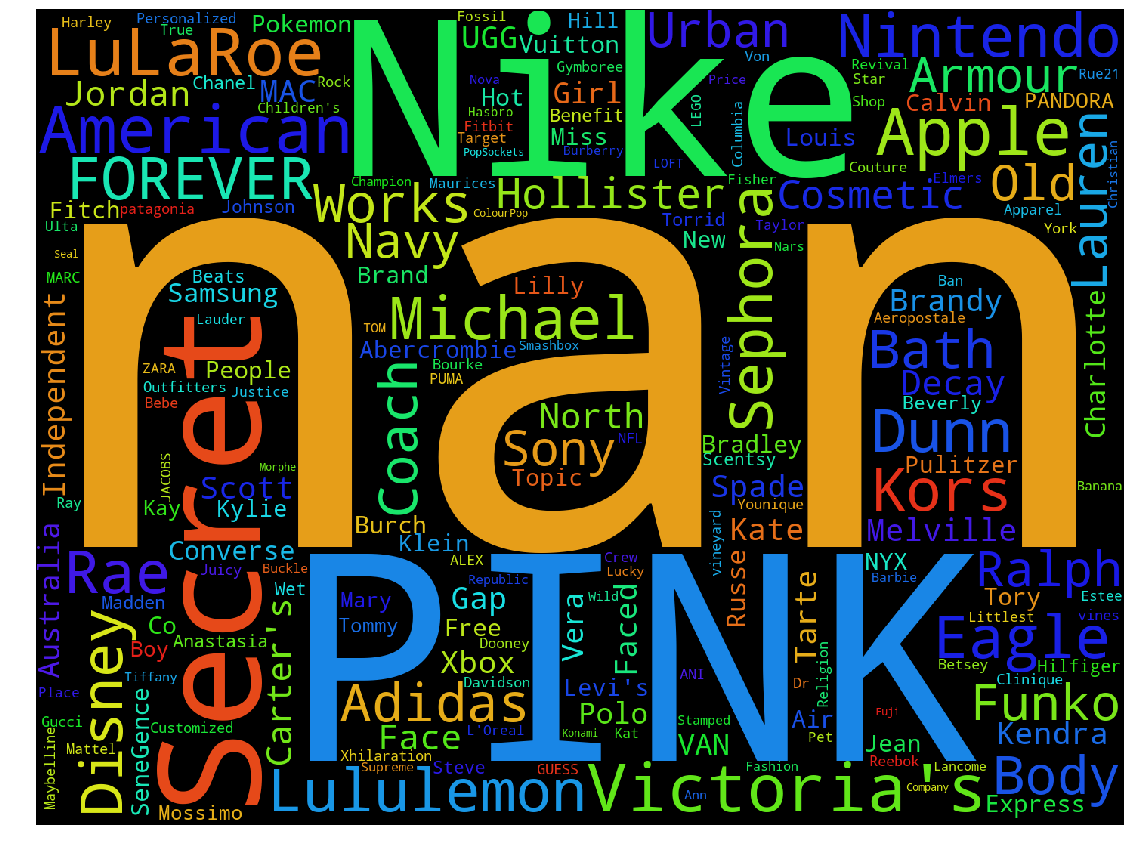

In [88]:
# Brand Cloud

brand_cloud = WordCloud(width=1440, height=1080).generate(" ".join(train["with_brands"].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(brand_cloud)
plt.axis('off')

In [27]:
def countplot(x, data, figsize=(10,5)):
    """
    Wraps the countplot function of seaborn and allow to specify the size of the figure.
    """ 
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.countplot(x=x, data=data, ax=ax, order=data[x].value_counts().index)
    for tick in ax.get_xticklabels():
        tick.set_rotation(60)


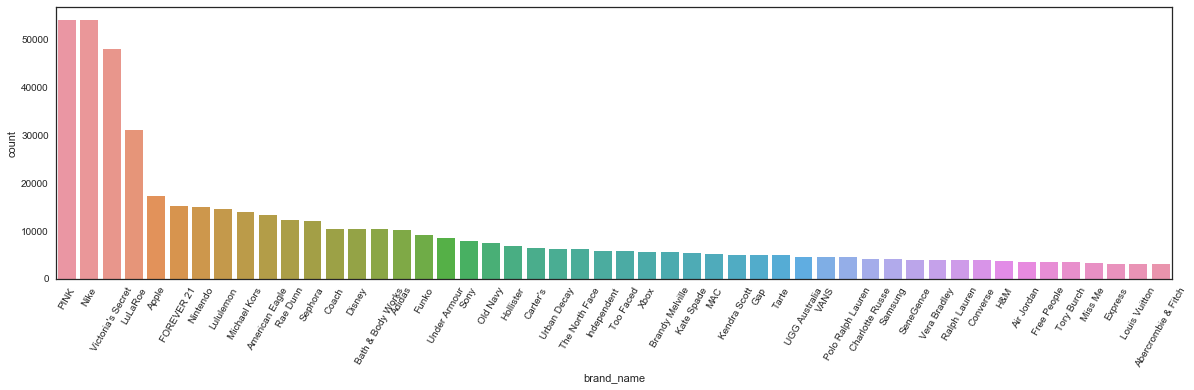

In [28]:
values = train['brand_name'].value_counts()
#print(values)
countplot('brand_name', train[train['brand_name'].isin(values.index[0:50])] , figsize=(20,5))

There are totaly 4810 brand names


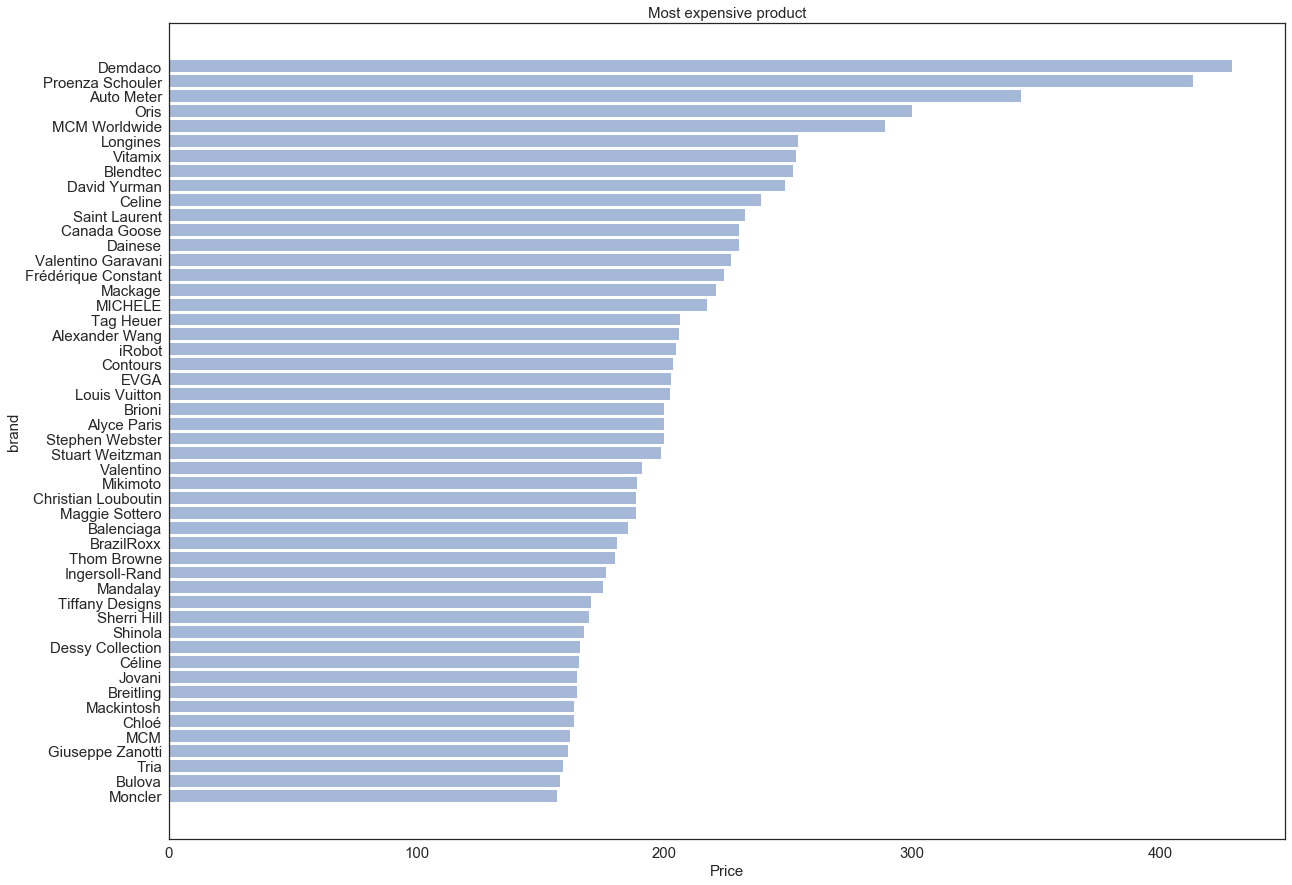

In [69]:
#most expensive brand

def mean_price(groupby='category_sub1', cnt=20, top=True):
    df = train.groupby([groupby])['price'].agg(['size','sum'])
    df['mean_price']=df['sum']/df['size']
    df.sort_values(by=['mean_price'], ascending=(not top), inplace=True)
    df = df[:cnt]
    df.sort_values(by=['mean_price'], ascending=top, inplace=True)
    return df

def price_barh(df, title, ylabel):
    plt.figure(figsize=(20, 15))
    plt.barh(range(0,len(df)), df['mean_price'], align='center', alpha=0.5)
    plt.yticks(range(0,len(df)), df.index, fontsize=15)
    plt.xticks(fontsize=15)
    plt.title(title, fontsize=15)
    plt.xlabel('Price', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    
brands = train['brand_name'].unique()
print('There are totaly %d brand names' % len(brands))

df = mean_price(groupby='brand_name', cnt=50, top=True)
price_barh(df, 'Most expensive product', 'brand')

# Item description

In [48]:

train['no_descrip'] = 0
train.loc[train.item_description=='No description yet', 'no_descrip'] = 1
i = str(round(train['no_descrip'].value_counts(normalize=True).iloc[1] * 100,2)) + '%'
print(i, 'of items don\'t have description. \n')

i1 = str(round((train.no_descrip[train.price > 100].sum() / len(train.no_descrip))*100,2)) + '%'
i2 = str(round((train.no_descrip[train.price <= 100].sum() / len(train.no_descrip))*100,2)) + '%'

print('Only', i1, 'of the items with price higher than 100$ don\'t have description, \n' 'remaining', i2,'are items with prices lower than 100$')



5.56% of items don't have description. 

Only 0.08% of the items with price higher than 100$ don't have description, 
remaining 5.48% are items with prices lower than 100$


(-0.5, 1439.5, 1079.5, -0.5)

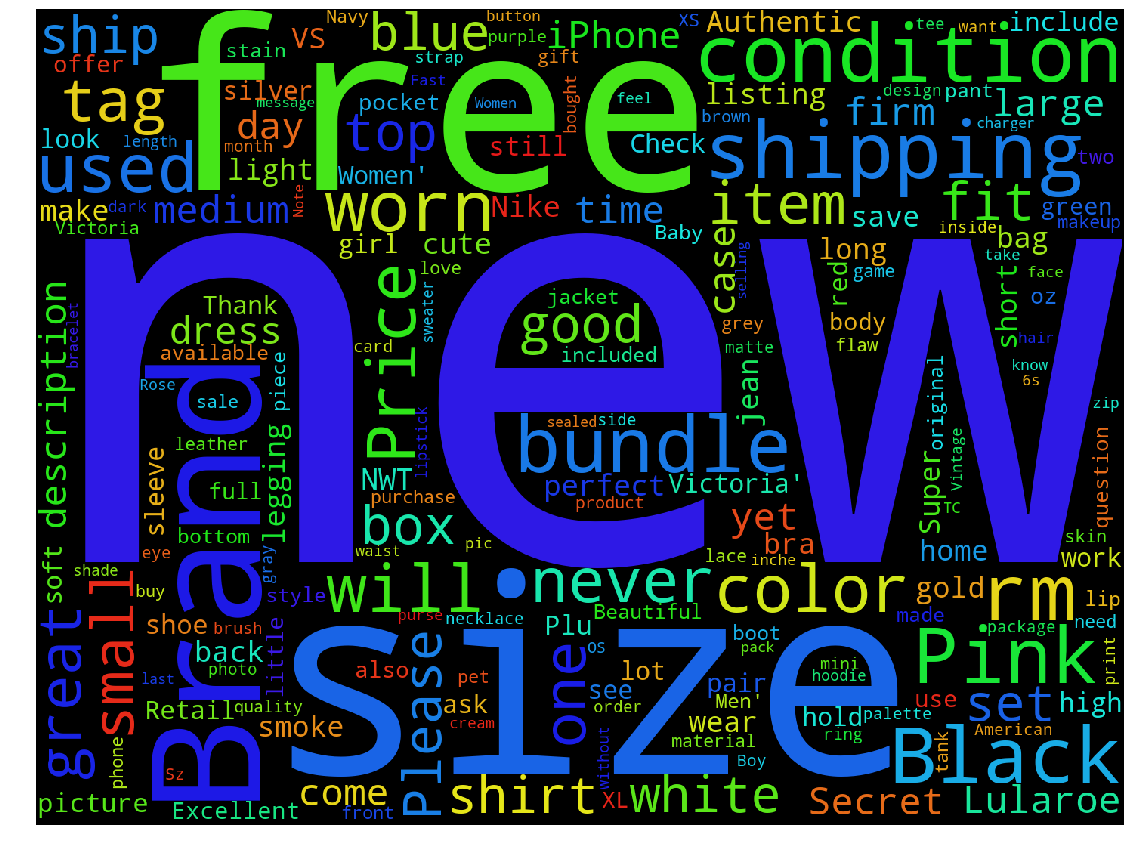

In [92]:
#most frequent word in name and item description 

cloud = WordCloud(width=1440, height=1080).generate(" ".join(train['name'].astype(str) + " " + train['item_description'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

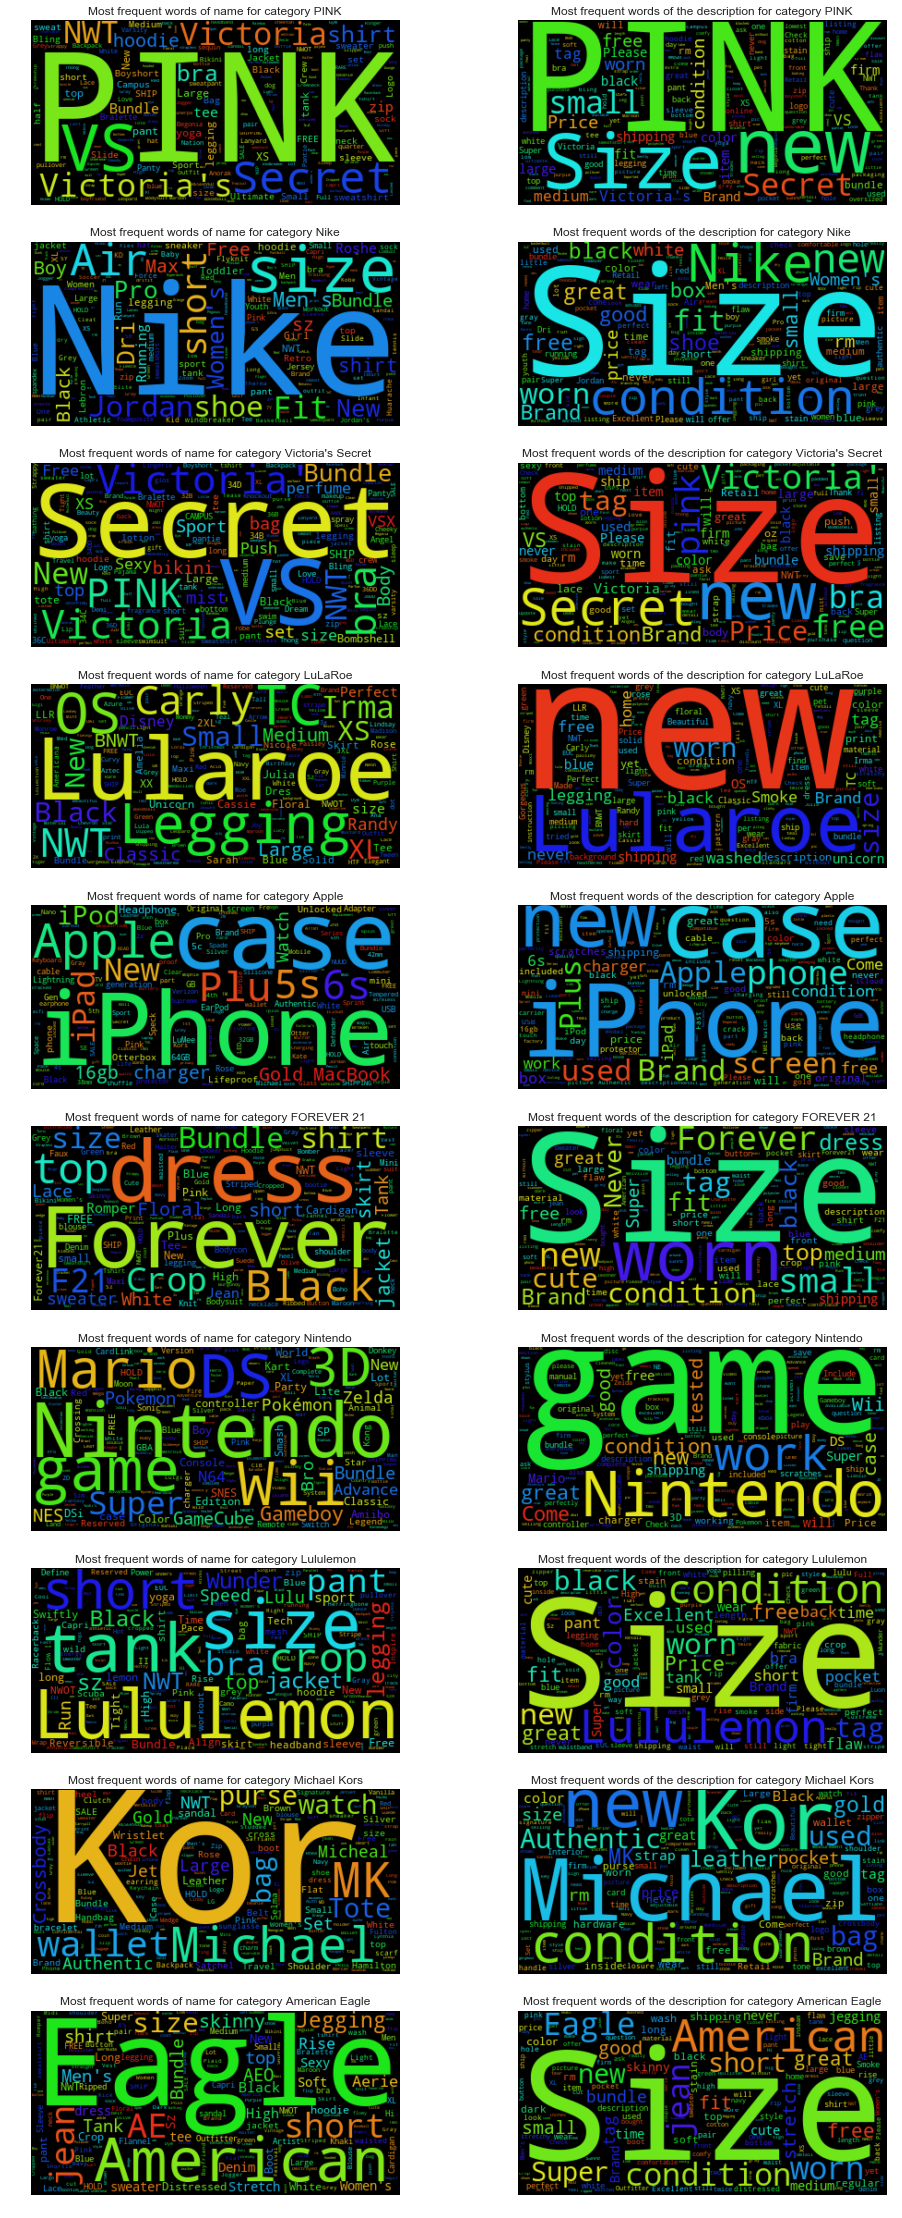

In [93]:
# Most frequent words of name for category
# Most frequent words of the description for category
          
def subplots(x, y, z, data, hue=None, showfliers=False, figsize=(16,5)):
    """
    Boxplots and barplot. Wraps seabon's boxplot and barplot methods.
    """ 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    sns.barplot(x=x, y=y, data=data, order=data[x].value_counts().index, hue=hue, ax=ax1)
    sns.boxplot(x=x, y=y, data=data, order=data[x].value_counts().index, hue=hue, ax=ax2, showfliers=showfliers)
    for tick1, tick2 in zip(ax1.get_xticklabels(), ax2.get_xticklabels()):
        tick1.set_rotation(90)
        tick2.set_rotation(90)
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)    
    sns.barplot(x=x, y=z, data=data, order=data[x].value_counts().index, hue=hue, ax=ax1)
    sns.boxplot(x=x, y=z, data=data, order=data[x].value_counts().index, hue=hue, ax=ax2, showfliers=showfliers)
    for tick1, tick2 in zip(ax1.get_xticklabels(), ax2.get_xticklabels()):
        tick1.set_rotation(90)
        tick2.set_rotation(90)
        
        
fig, axes = plt.subplots(10, 2, figsize=(16,40))
cats = train['brand_name'].value_counts().index
for i in range(10):
    ax1, ax2 = axes[i]    
    cat = cats[i]
    wordcloud1 = WordCloud().generate((train[train['brand_name']==cat]['name'].sample(10000) + ' ').sum())
    wordcloud2 = WordCloud().generate((train[train['brand_name']==cat]['item_description'].sample(10000) + ' ').sum())
    ax1.imshow(wordcloud1, interpolation='bilinear')
    ax2.imshow(wordcloud2, interpolation='bilinear')
    ax1.axis("off")
    ax2.axis("off")
    ax1.set_title('Most frequent words of name for category ' + cat)
    ax2.set_title('Most frequent words of the description for category ' + cat)



Text(0,0.5,'Price')

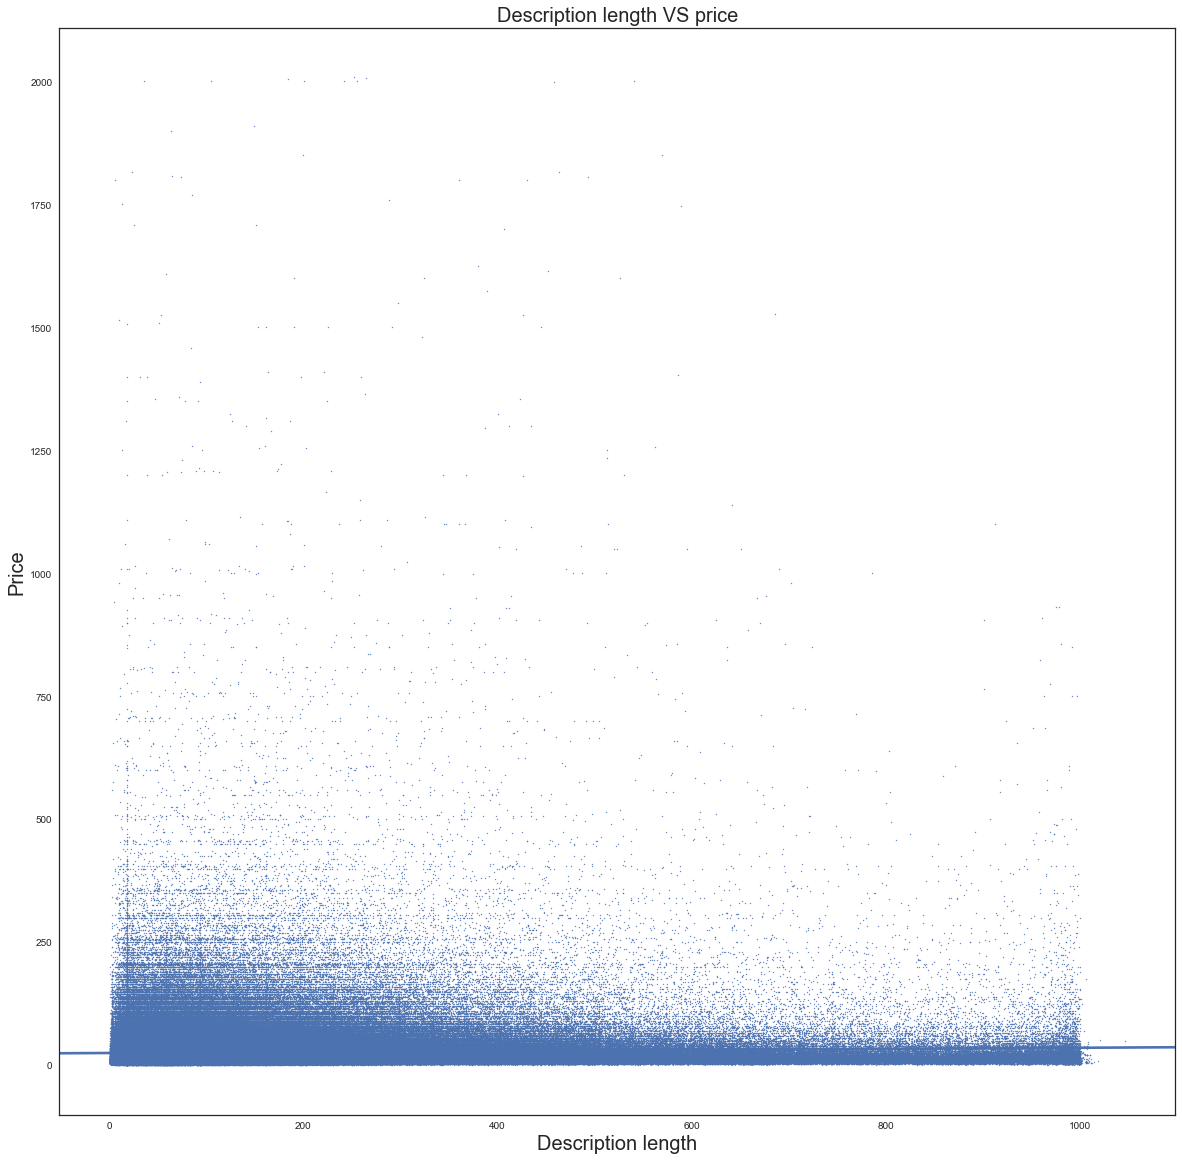

In [94]:
# Description length vs price

train['coms_length'] = train['item_description'].str.len()

# Some descriptive statistics
pd.options.display.float_format = '{:.2f}'.format
train['coms_length'].describe()

#Is there a correlation between description length and price ?

plt.figure(figsize=(20,20))
sns.regplot(x ='coms_length',y='price', data = train, scatter_kws={'s':2})
plt.title ('Description length VS price', fontsize = 20)
plt.xlabel('Description length', fontsize = 20)
plt.ylabel('Price', fontsize = 20)


# Category name

In [95]:


cat = train.category_name.value_counts().size
print ('We have', cat, 'different items categories.')



We have 1287 different items categories.


In [108]:
train['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                                  19103
Women/Shoes/Boots                 

C:\Users\s1kor\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
C:\Users\s1kor\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Text(0,0.5,'')

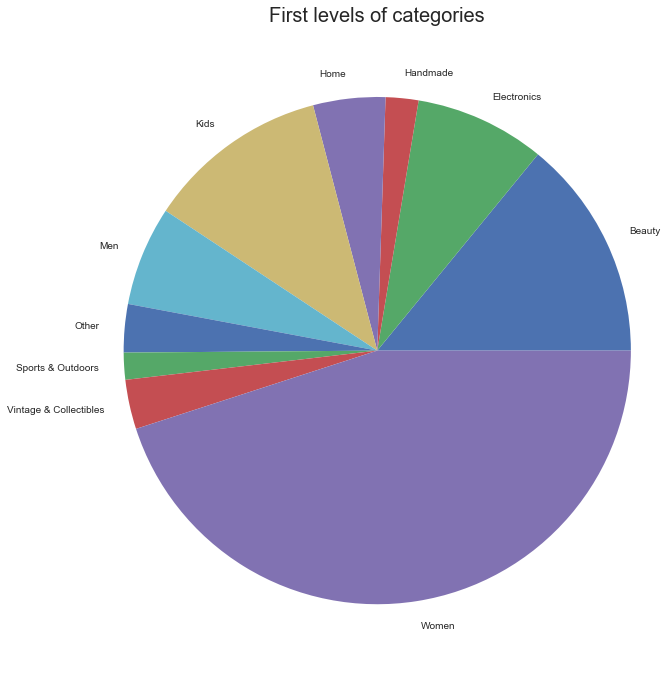

In [136]:
train['cat1'] = train.category_name.str.extract('([^/]+)/[^/]+/[^/]+')
train['cat2'] = train.category_name.str.extract('([^/]+/[^/]+)/[^/]+')

plt.figure(figsize = (10,12))
train.name.groupby(train.cat1).count().plot(kind = 'pie')
plt.title ('First levels of categories', fontsize = 20)
plt.axis('equal')
plt.ylabel('')

# Price

In [94]:


#pd.options.display.float_format = '{:.2f}'.format
train.price.describe()



count   1482535.00
mean         26.74
std          38.59
min           0.00
25%          10.00
50%          17.00
75%          29.00
max        2009.00
Name: price, dtype: float64

'\nimport squarify\n\nfig = plt.figure(figsize = (15, 10))\nregions = train.main_cat.value_counts().to_frame()\nax = fig.add_subplot(111, aspect = "equal")\nax = squarify.plot(sizes = regions["main_cat"].values, label = regions.index,\n              color = sns.color_palette("viridis", 10), alpha = 1)\nax.set_xticks([])\nax.set_yticks([])\nfig = plt.gcf()\nfig.set_size_inches(20, 15)\nplt.title("Treemap of Main Category", fontsize = 18)\nplt.show()\n\n\n'

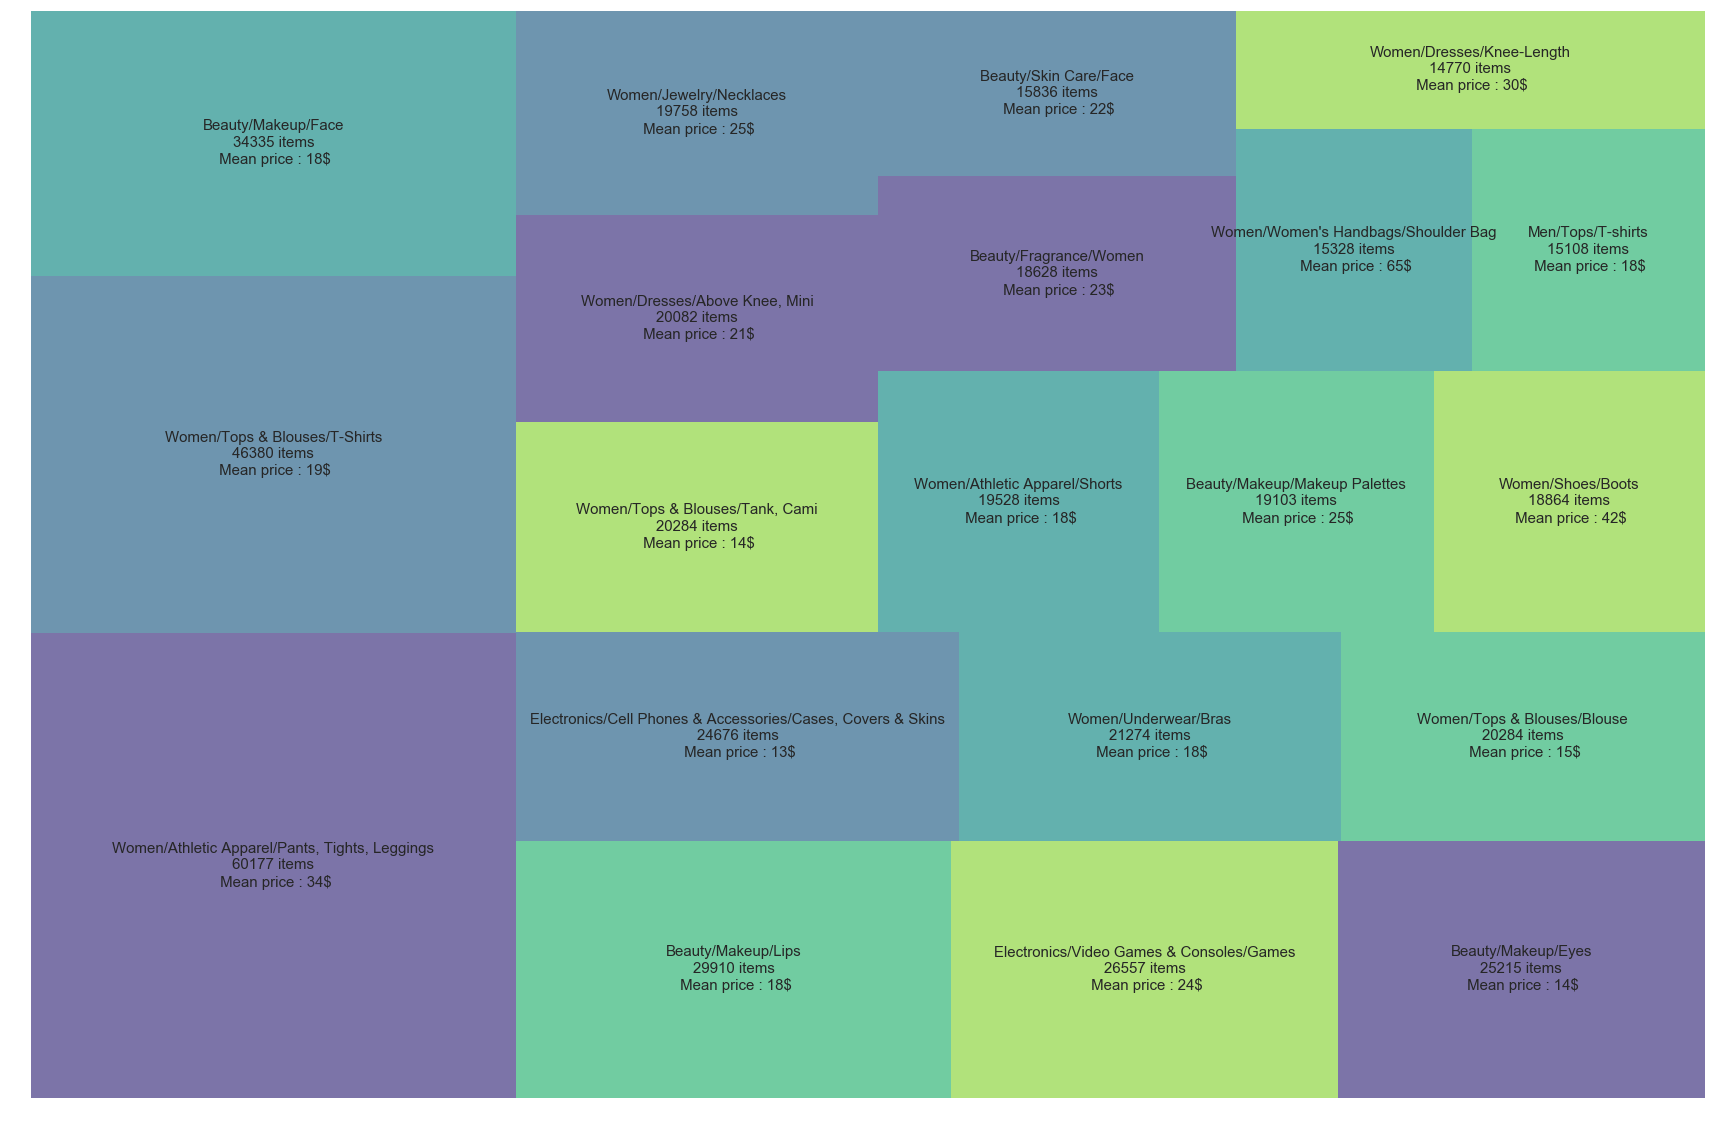

In [144]:
### TO-DO

# Size of each category
cats = pd.DataFrame(train.category_name.value_counts())
cats.reset_index(level = 0, inplace=True)
cats = cats.sort_values(by='category_name', ascending = False).head(20)
cats.columns =('category_name', 'size')

# Price by category
group = train.groupby(train.category_name)
mean_price = group.price.mean()
mean_price = pd.DataFrame(mean_price)
mean_price.reset_index(level = 0, inplace=True)

# Merging
cats = pd.merge(cats, mean_price, how='left', on = 'category_name')

# Colors setting
cmap = plt.cm.viridis
mini=min(cats['size'])
maxi=max(cats['size'])
#norm = plt.colors(vmin=mini, vmax=maxi)
#colors = [cmap(norm(value)) for value in cats['size']]
#norm = colors.LogNorm(vmin=Z1.min(), vmax=Z1.max())

# Labels setting
labels = ["%s\n%d items\n Mean price : %d$" % (label) \
          for label in zip(cats['category_name'], cats['size'], cats['price'])]

# Plotting
plt.figure(figsize=(30,20))
plt.rc('font', size=15)
squarify.plot(sizes = cats['size'], label = labels, alpha = .7, color=sns.color_palette("viridis", 5))
plt.axis('off')



"""
import squarify

fig = plt.figure(figsize = (15, 10))
regions = train.main_cat.value_counts().to_frame()
ax = fig.add_subplot(111, aspect = "equal")
ax = squarify.plot(sizes = regions["main_cat"].values, label = regions.index,
              color = sns.color_palette("viridis", 10), alpha = 1)
ax.set_xticks([])
ax.set_yticks([])
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.title("Treemap of Main Category", fontsize = 18)
plt.show()


"""

Text(0.5,0,'Mean price')

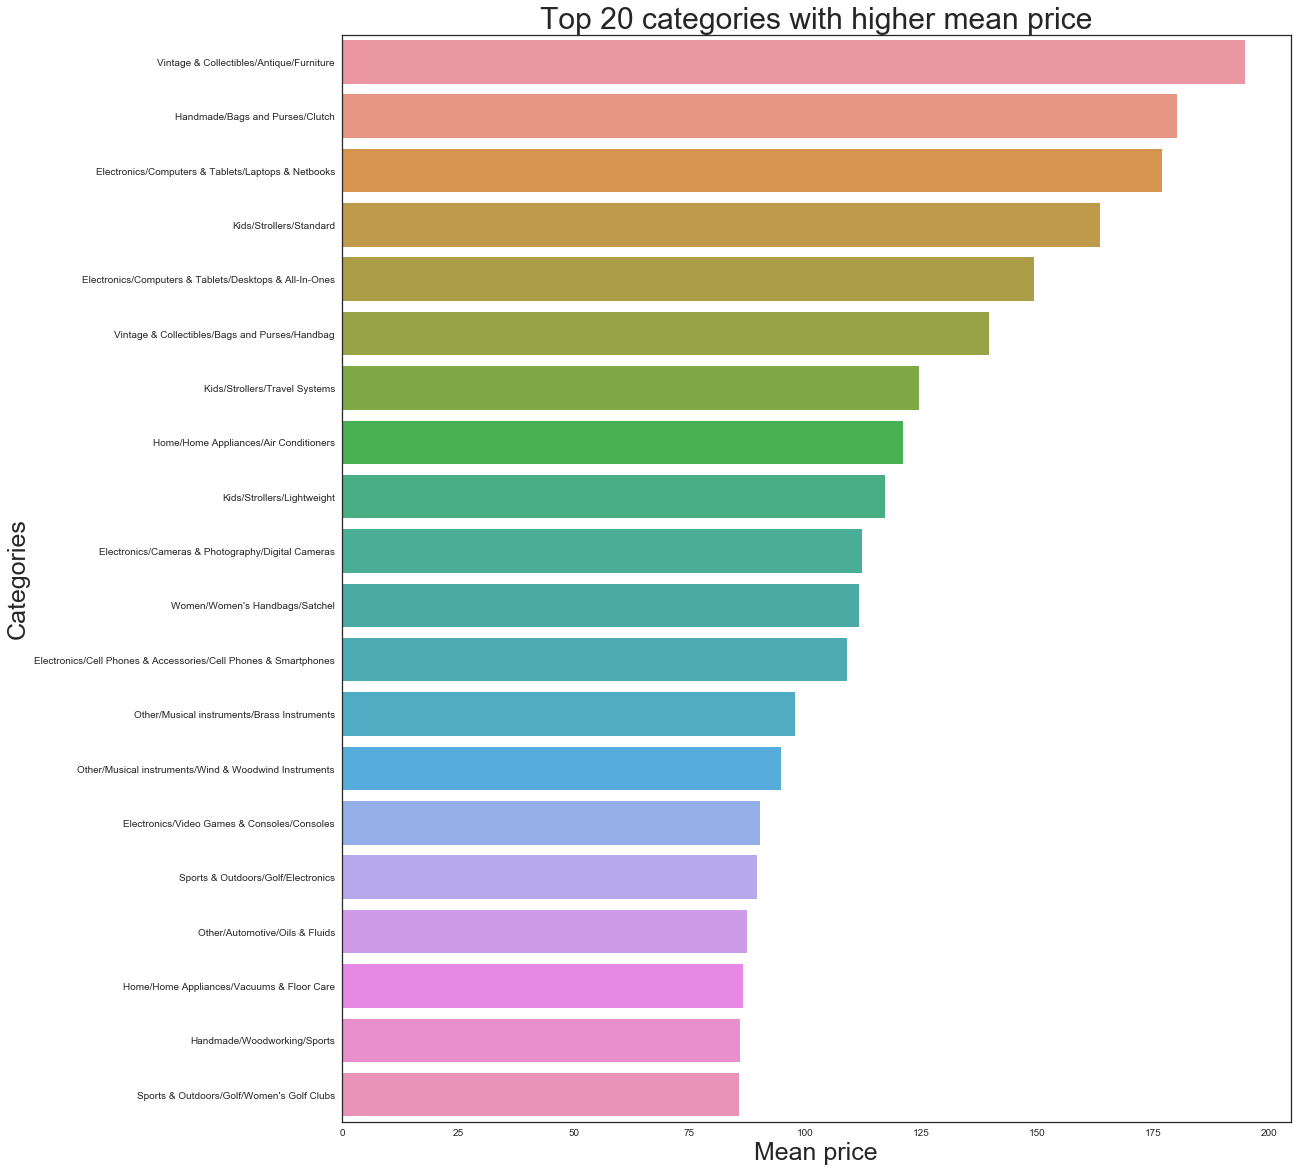

In [137]:


group = train.groupby(train.category_name)
mean_price = pd.DataFrame(group.price.mean())
mean_price = mean_price.sort_values(by='price', ascending = False).head(20)
mean_price.reset_index(level = 0, inplace=True)

plt.figure(figsize=(17,20))
sns.barplot(x = 'price', y = 'category_name', data = mean_price, orient = 'h')
plt.title('Top 20 categories with higher mean price', fontsize = 30)
plt.ylabel('Categories', fontsize = 25)
plt.xlabel('Mean price', fontsize = 25)



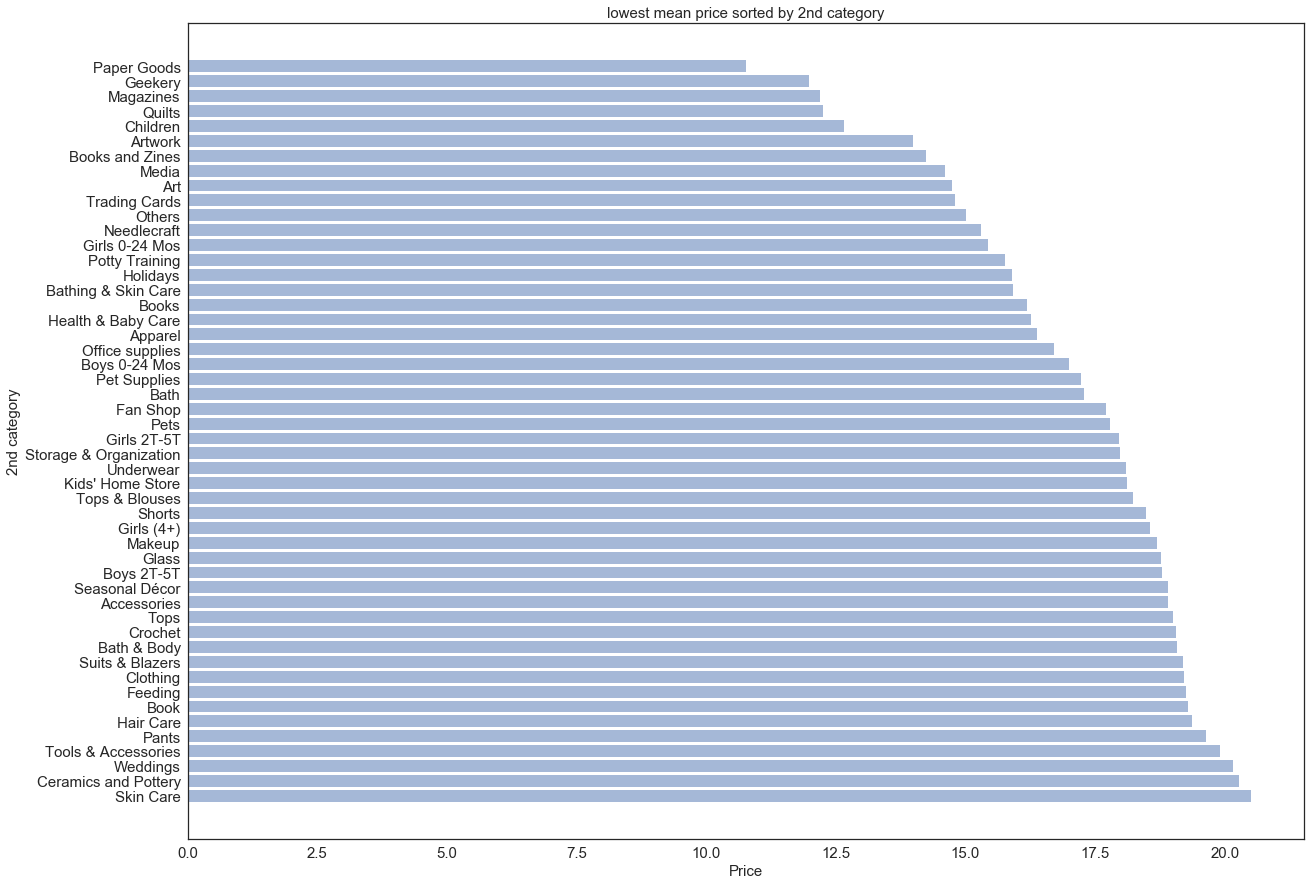

In [75]:


df = mean_price(cnt=50, top=False)
price_barh(df, 'lowest mean price sorted by 2nd category', '2nd category')



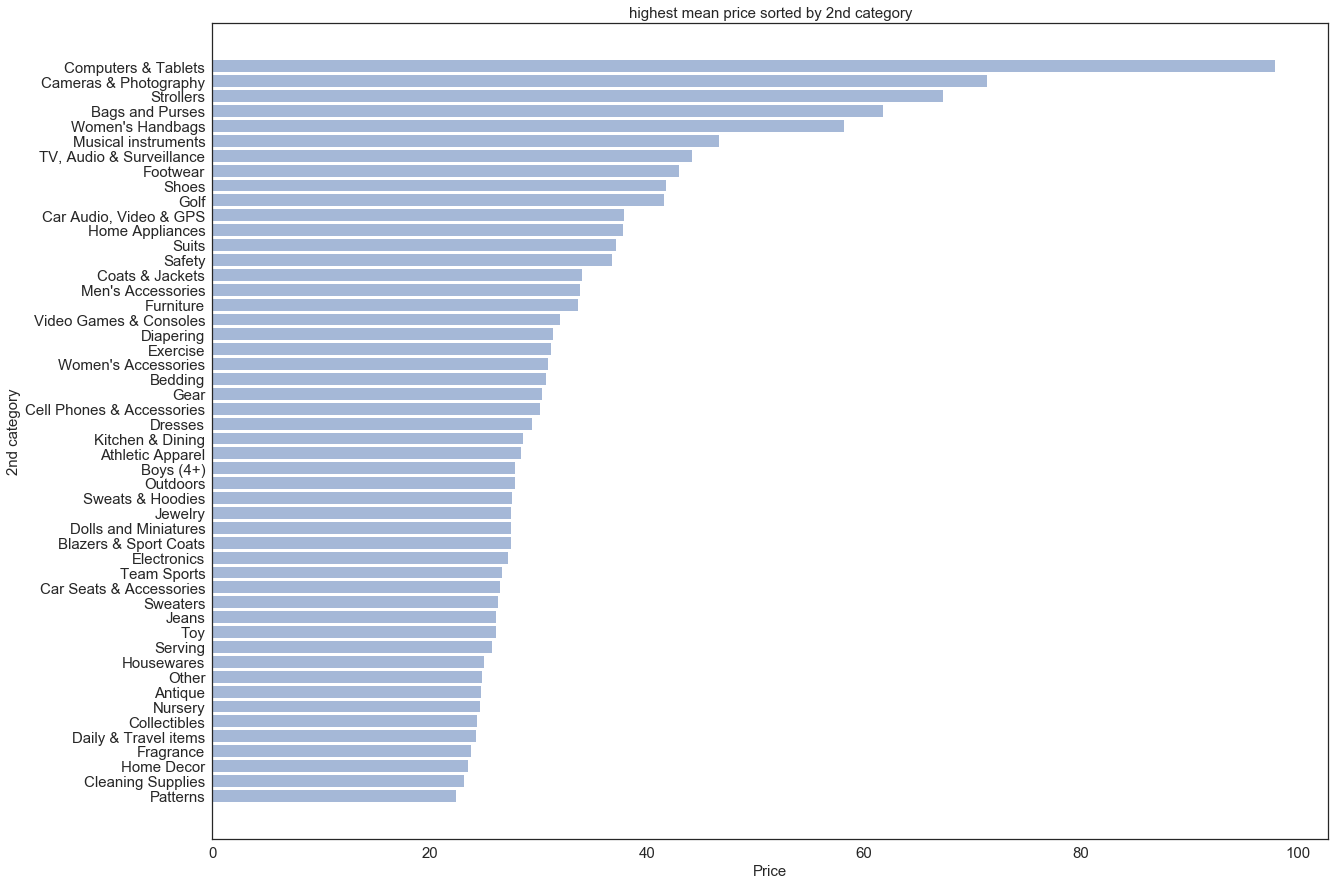

In [74]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2 = category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

df = mean_price(cnt=50)
price_barh(df, 'highest mean price sorted by 2nd category', '2nd category')



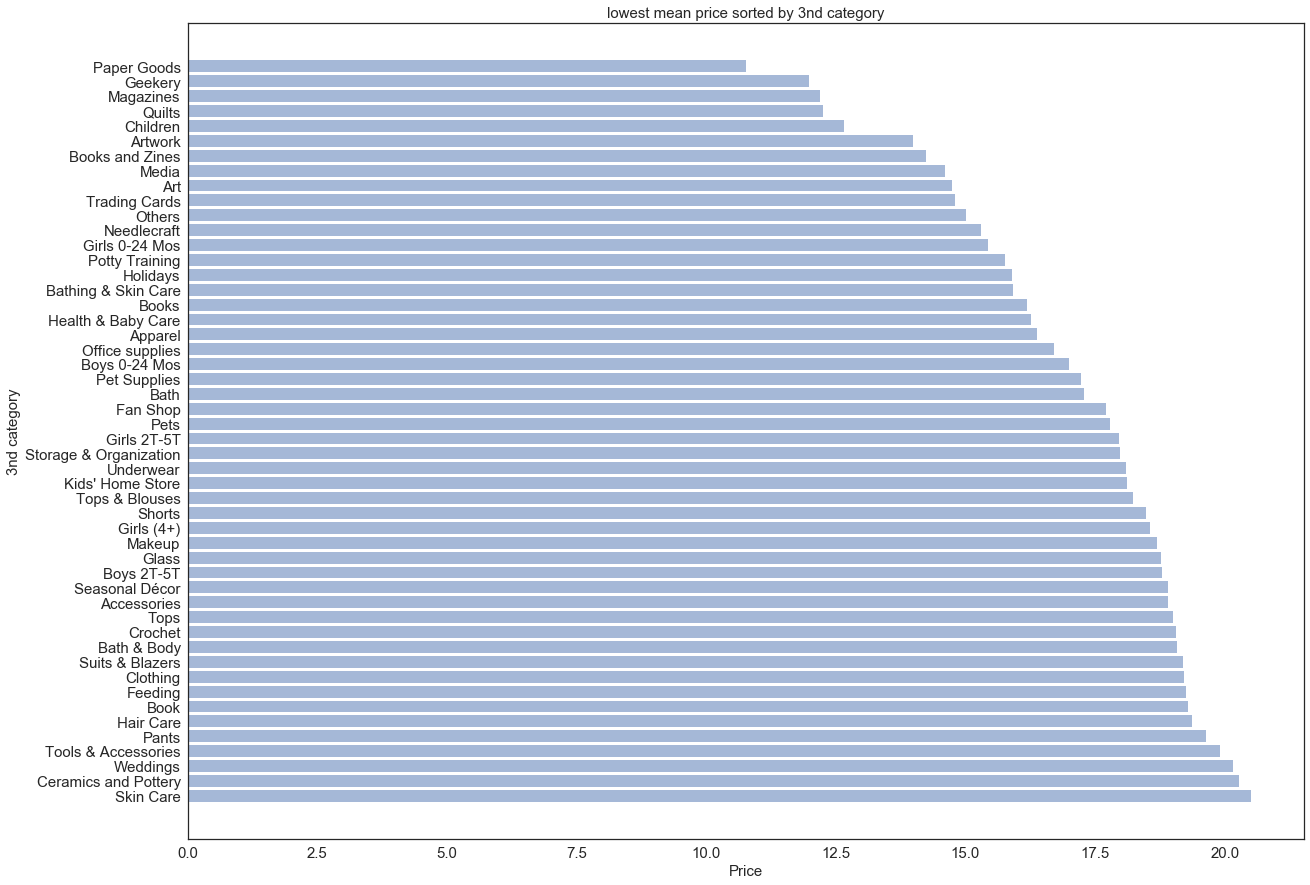

In [78]:


df = mean_price(cnt=50, top=False)
price_barh(df, 'lowest mean price sorted by 3nd category', '3nd category')



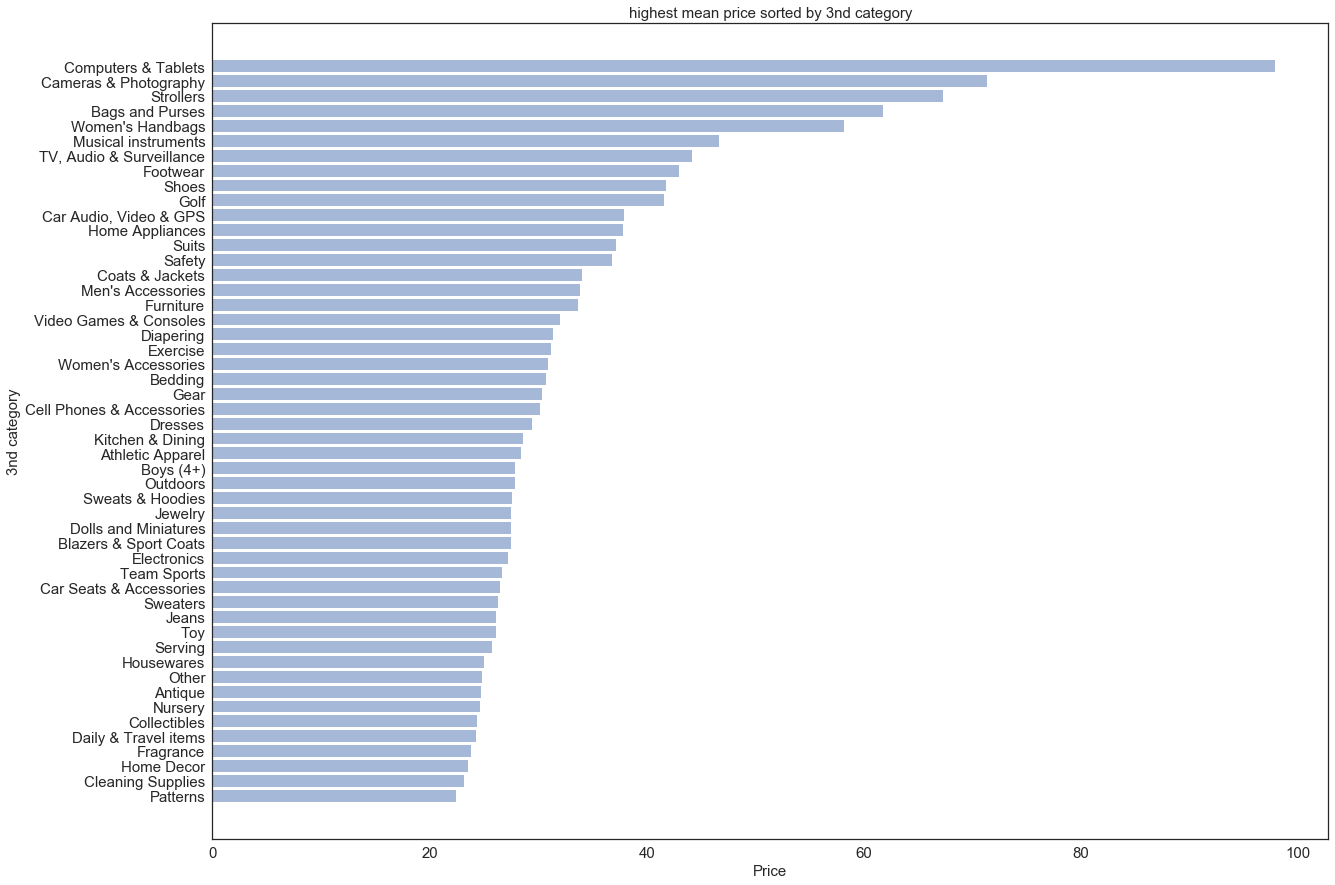

In [77]:


df = mean_price(cnt=50)
price_barh(df, 'highest mean price sorted by 3nd category', '3nd category')



In [76]:
print('%d type of 3rd categories.' % len(train['category_sub2'].unique()))

865 type of 3rd categories.


Text(0.5,1,'Simple distribution plot of the price')

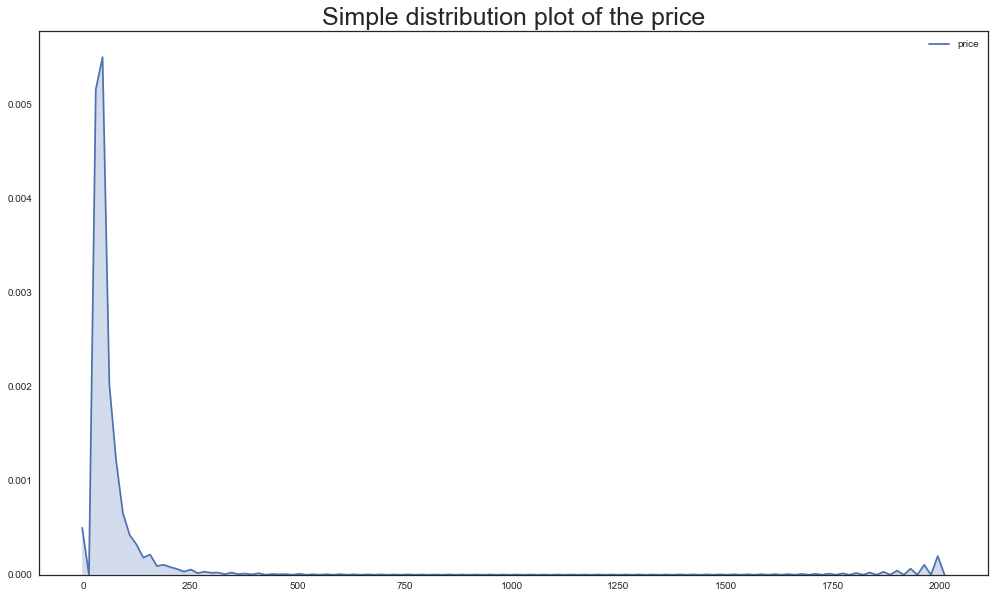

In [95]:


plt.figure(figsize=(17,10))
sns.kdeplot(train.price, shade = True)
plt.title('Simple distribution plot of the price', fontsize =25)



Text(0.5,0,'Number of product in the category')

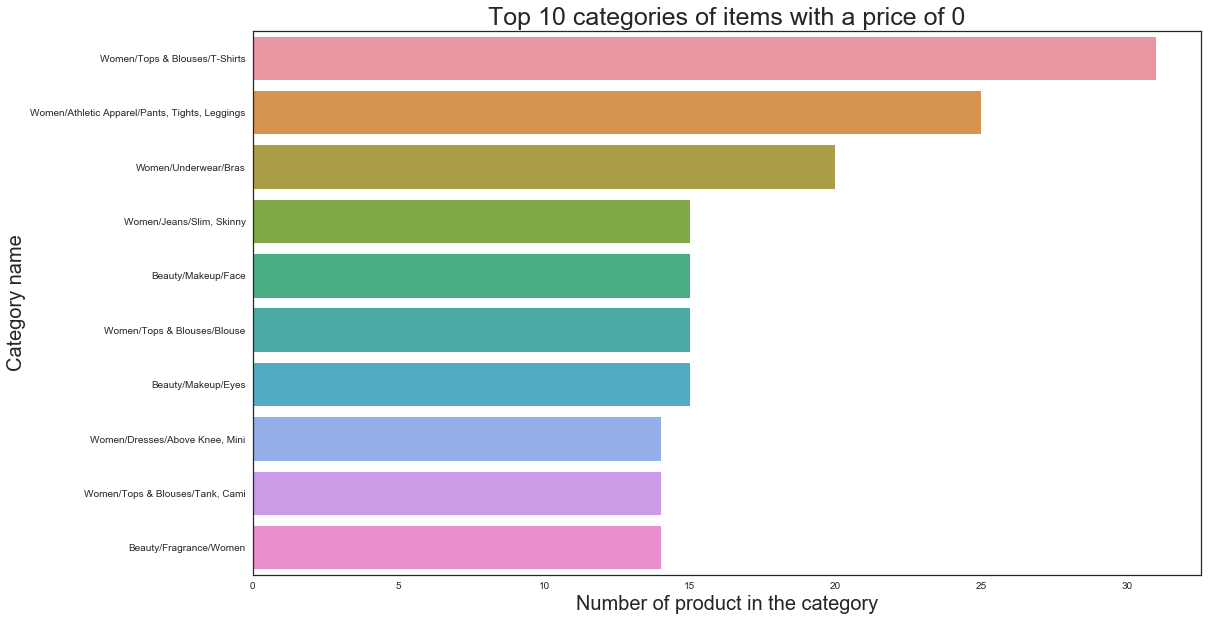

In [135]:
price_of_zero = train.loc[train.price == 0]

plt.figure(figsize=(17,10))
sns.countplot(y = price_of_zero.category_name, \
              order = price_of_zero.category_name.value_counts().iloc[:10].index, \
                                                      orient = 'v')
plt.title('Top 10 categories of items with a price of 0', fontsize = 25)
plt.ylabel('Category name',  fontsize = 20)
plt.xlabel('Number of product in the category',  fontsize = 20)



Most of items have a low price (75% under 29$), but there are so very high extremum. Strangely, a lot of items seems to have a price of 0.


Text(0.5,0,'Price')

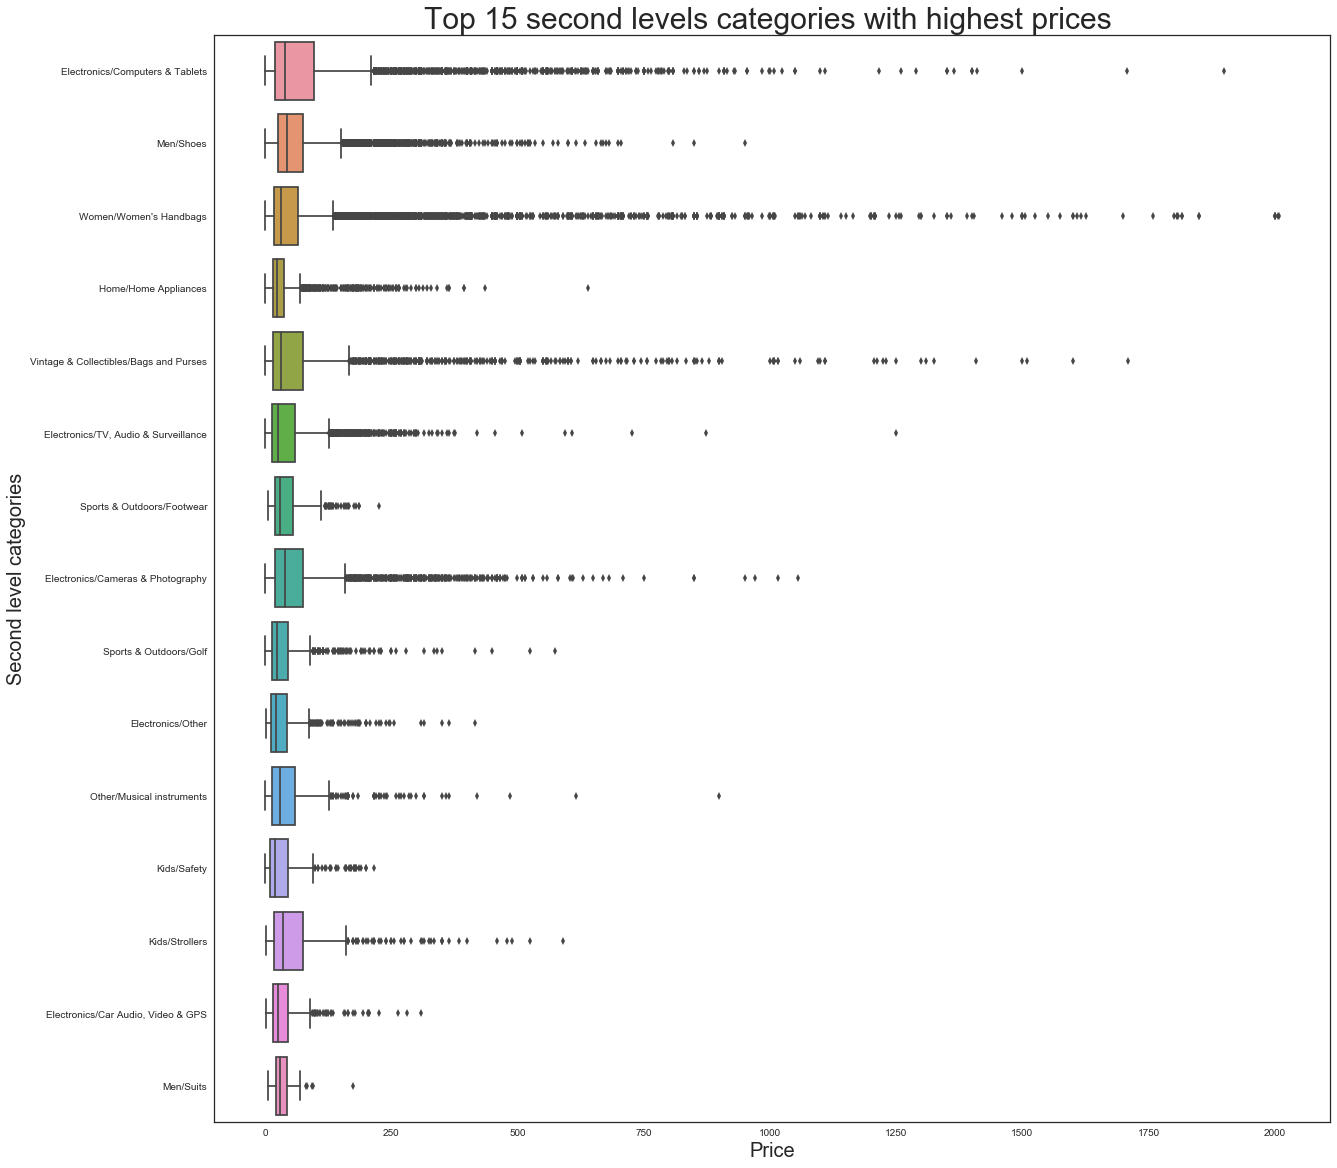

In [138]:


#Firstly, we create a ranking of our level 2 categories, by price
level2 =  train.groupby('cat2')
rank_level2 = pd.DataFrame(level2.mean()).sort_values(by='price')

#Then, we stock the top 15 most expensive into a list
top_cat2 = rank_level2.tail(15).reset_index()
top_cat2_list = top_cat2.cat2.unique().tolist()
#We don't only want mean price by category, but all basics statistics, so we need the full series
top_cat2_full = train.loc[train['cat2'].isin(top_cat2_list)]

#We can now plot it !
plt.figure(figsize=(20,20))
sns.boxplot(y ='cat2',x= 'price', data = top_cat2_full, orient = 'h')
plt.title('Top 15 second levels categories with highest prices ', fontsize = 30)
plt.ylabel ('Second level categories', fontsize = 20)
plt.xlabel ('Price', fontsize = 20)



In [96]:
i = train.price[train.price == 0].count()
print (i, 'items have a price of zero.')

874 items have a price of zero.


count   1482535.00
mean         26.74
std          38.59
min           0.00
25%          10.00
50%          17.00
75%          29.00
max        2009.00
Name: price, dtype: float64


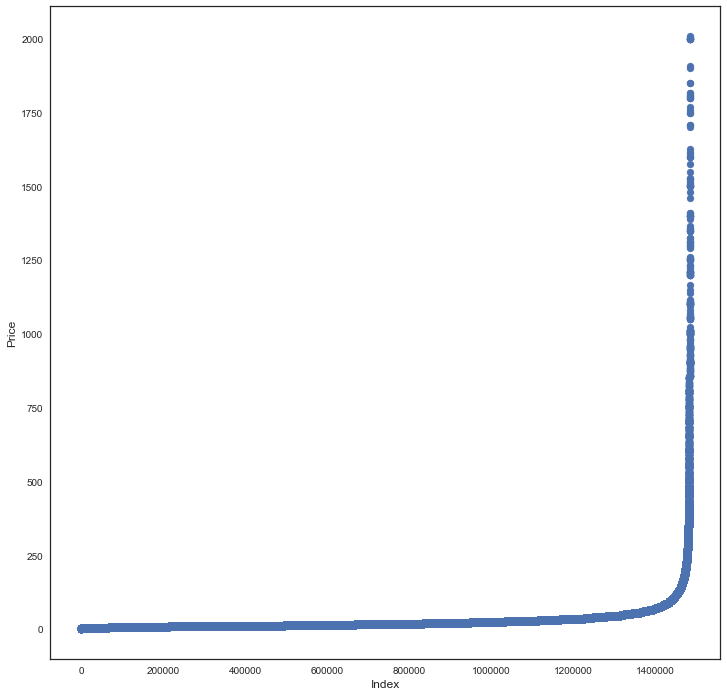

In [97]:
price = train['price']
print(price.describe())
plt.figure(figsize=(12,12))
plt.scatter(range(train.shape[0]),np.sort(price.values))
plt.ylabel('Price', fontsize=12)
plt.xlabel('Index', fontsize=12)
plt.show()

# Condition

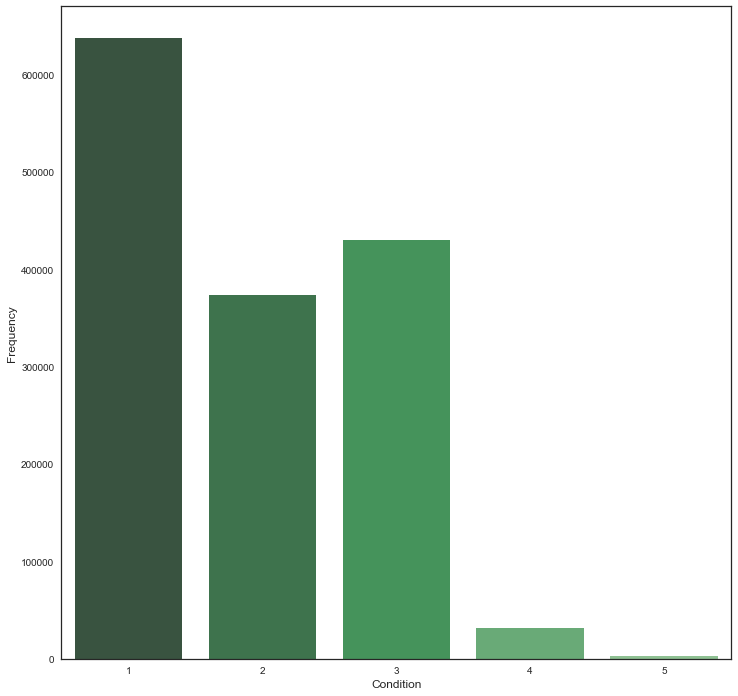

In [55]:
plt.figure(figsize=(12,12))
sns.countplot(x="item_condition_id", data=train, palette="Greens_d")
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

There are five unique values of item_condition_id with "1" being of highest frequency and "4", "5" being the rarer ones.

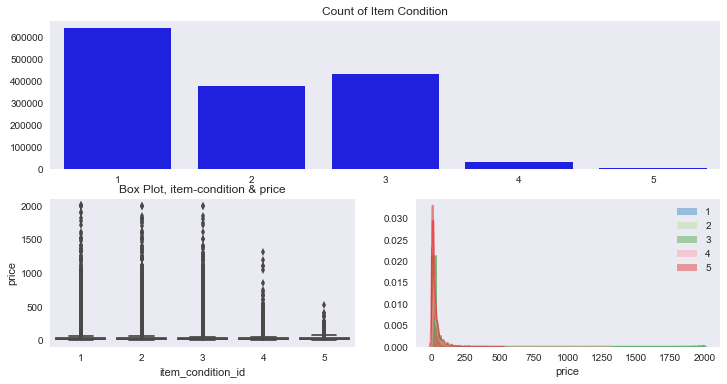

In [100]:
plt.figure(figsize = (12,6))
sns.despine(left = True)
sns.set_style("darkgrid", {'axes.grid' : False})

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
cntCondition = train['item_condition_id'].value_counts()
sns.barplot(cntCondition.index, cntCondition.values, color = 'b', ax = ax1)
ax1.set_title('Count of Item Condition', fontsize = 12)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = 'item_condition_id', y = 'price', data = train, palette = sns.color_palette('RdBu',5), ax = ax2)
ax2.set_title('Box Plot, item-condition & price', fontsize = 12)

ax3 = plt.subplot2grid((2,2), (1,1))
group = train['price'].groupby(train['item_condition_id'])
color = sns.color_palette("Paired", 10)
for con, pri in group:
    sns.distplot(pri, kde = True, label = str(con), color = color[con], ax = ax3, kde_kws = {'alpha' : 0.5})
ax3.legend() 
plt.show()

In [ ]:
# item condition vs brand

pantExp = pantExp.loc[pantExp['brand'].isin(number), :]
pantExp['predictBrandVal'] = pantExp['brand'].map({'PINK' : 'gd', 'Lululemon' : 'bd', 'Old Navy': 'bd', 'American Eagle':'bd', 'Express' : 'bd'})
sns.factorplot(x = 'price', y = 'brand', col = 'item_condition', kind = 'box', col_order = [1,2,3,4], col_wrap = 2, order = 
               ['PINK', 'Lululemon','Old Navy','American Eagle', 'Express'], data = pantExp, size = 2, aspect = 2)
plt.show()



In [ ]:
# item condition - brand - price

pantExp = trainS.loc[pantSet.index, ['item_condition', 'brand', 'price']].copy()
pantExp['item_condition'].replace(5, 4, inplace = True)
pantComp = pantExp['brand'].value_counts()[pantExp['brand'].value_counts() > 100].index.values[:5]
number = pantComp
fiveComp = trainS.loc[trainS['brand'].isin(number),['brand', 'item_condition']]
sns.factorplot(x = 'item_condition' ,col = 'brand', col_wrap = 3, kind = 'count', data = fiveComp, size = 2, aspect = 2, sharey = False)
plt.show()



In [ ]:
# item condition vs mean price

fig, ax = plt.subplots(figsize=(6, 5))
plt.title('item_condition_id - Count vs Mean Price')
#style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_style("ticks")
ax2 = ax.twinx() #This allows the common axes to be shared
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
sns.countplot(x="item_condition_id",  data=train_df,  ax=ax, palette="Set1")
#ax.set_ylim(0,50000)
sns.set_style("dark")
sns.factorplot(x="item_condition_id", y="price", data=train_df,  ax=ax2, scale = 0.7,color='black')
ax2.set_ylim(0,40)
sns.despine(ax=ax)
plt.close(2)
plt.show()




# Shipping

How many product with free shipping? What's the price distribution with/without shipping?


In [102]:


free_shipping = train[train['shipping']==1]
print('%0.2f%% percent of the product with free shipping' % (100 * len(free_shipping)/len(train)))



44.73% percent of the product with free shipping


In [103]:
def price_hist(price1, price2, label1='price 1', label2='price 2',
                      bins=100, r=[0,200], title='Double Price Distribution', **argv):
    plt.figure(figsize=(20, 15))
    plt.hist(price1, bins=bins, range=r, label=label1, **argv)
    plt.hist(price2, bins=bins, range=r, label=label2, **argv)
    plt.title(title, fontsize=15)
    plt.xlabel('Price', fontsize=15)
    plt.ylabel('Samples', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

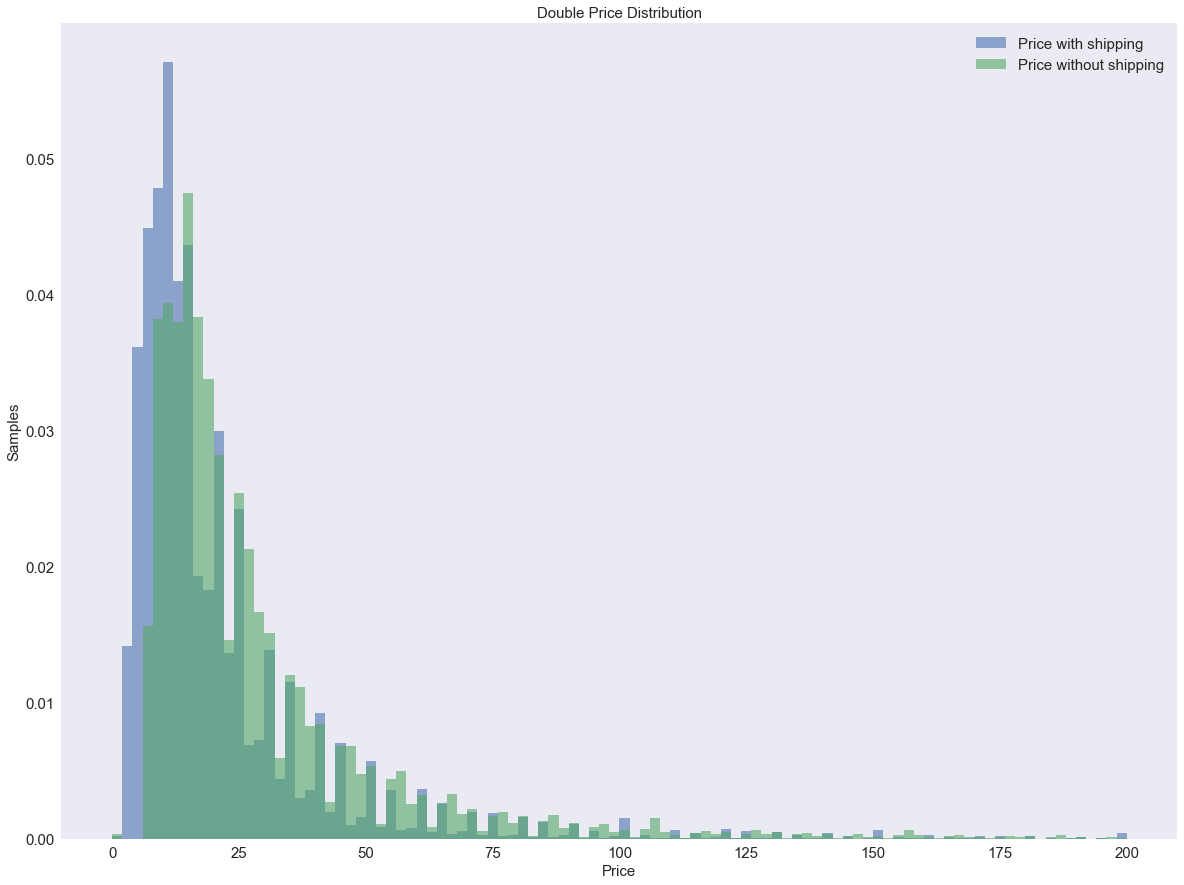

In [104]:
price_hist(price1=train[train['shipping']==1]['price'], 
                  price2=train[train['shipping']==0]['price'],
                  label1='Price with shipping',
                  label2='Price without shipping',
                  normed=True, alpha=0.6)



Seems the lower price have more chance to get free shipping. The boundary price is about 15 USD.


Text(0,0.5,'Price without outliers')

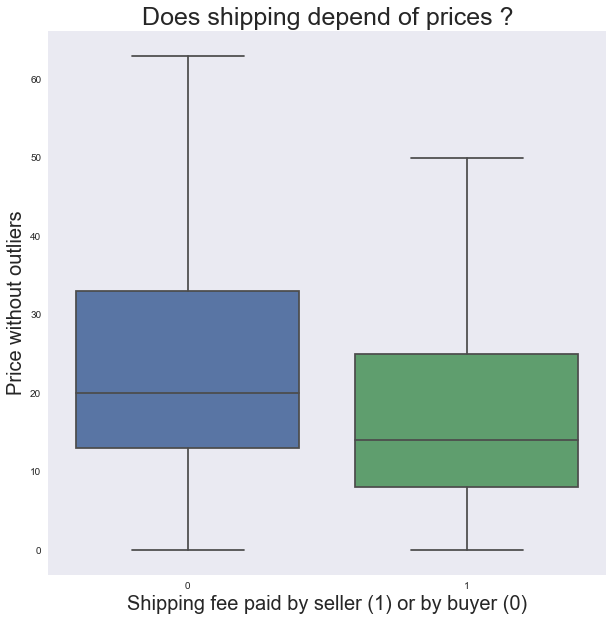

In [105]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train.shipping, y = train.price, showfliers=False, orient = 'v')
plt.title('Does shipping depend of prices ?', fontsize = 25)
plt.xlabel('Shipping fee paid by seller (1) or by buyer (0)', fontsize = 20)
plt.ylabel('Price without outliers', fontsize = 20)

## Result: 

